In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv').to_numpy()

In [3]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [4]:
pca = PCA(n_components=200)
data_pca = pca.fit_transform(data)
explained_variance = pca.explained_variance_ratio_

n_comps = list(range(1, 201))
expl_vars = [np.sum(explained_variance[:n + 1]) for n in range(len(n_comps))]

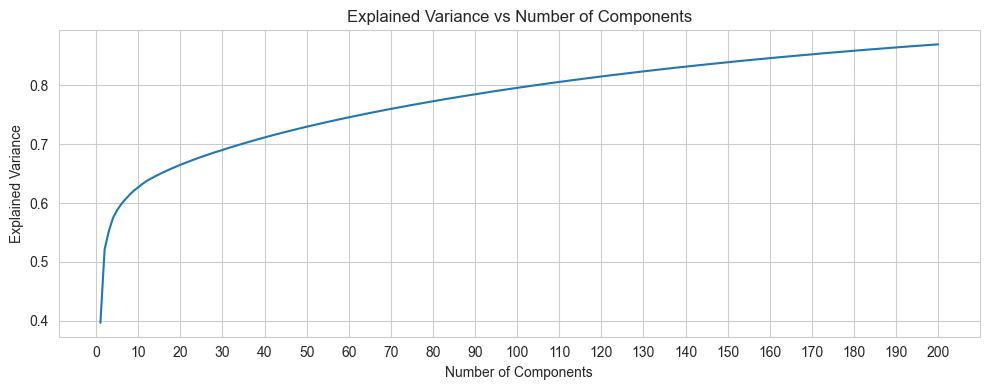

In [5]:
plt.plot(n_comps, expl_vars)
ax = plt.gca()
ax.set_title('Explained Variance vs Number of Components')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(0, 201, 10))
fig = plt.gcf()
fig.set_size_inches(10, 4)
plt.tight_layout()
plt.show()

In [6]:
pca = PCA(n_components=7)
data_pca = pca.fit_transform(data)

In [7]:
comp_1 = (data_pca[:, 0] - data_pca[:, 0].mean()) / data_pca[:, 0].std()
comp_2 = (data_pca[:, 1] - data_pca[:, 1].mean()) / data_pca[:, 1].std()

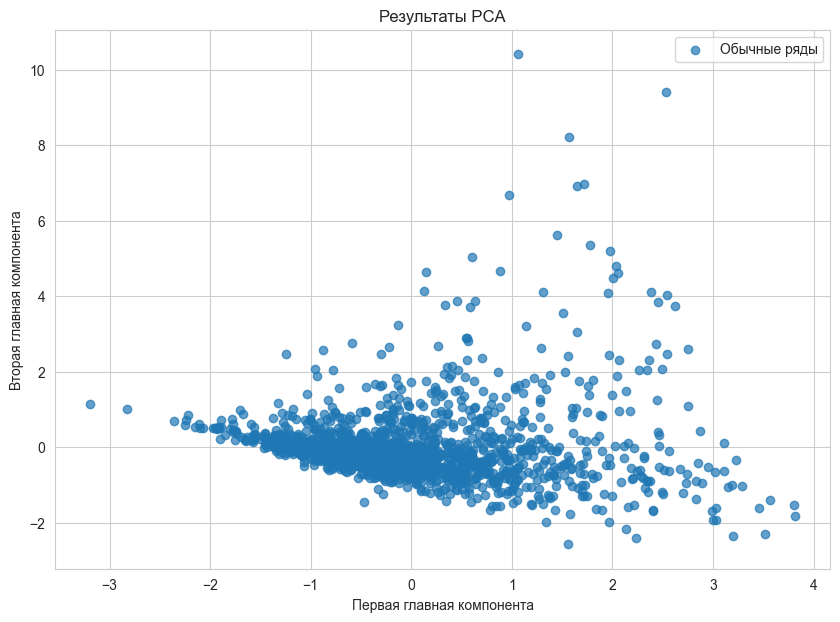

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(comp_1, comp_2, alpha=0.7, label="Обычные ряды")
plt.title("Результаты PCA")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.legend()
plt.show()

In [9]:
import matrixprofile as mp

def mprofile(ts):
    profile = mp.compute(ts, windows=48)
    figures = mp.visualize(profile)
    ax = plt.gca()
    ax.set_title(f'Matrix profile, 1 day window')

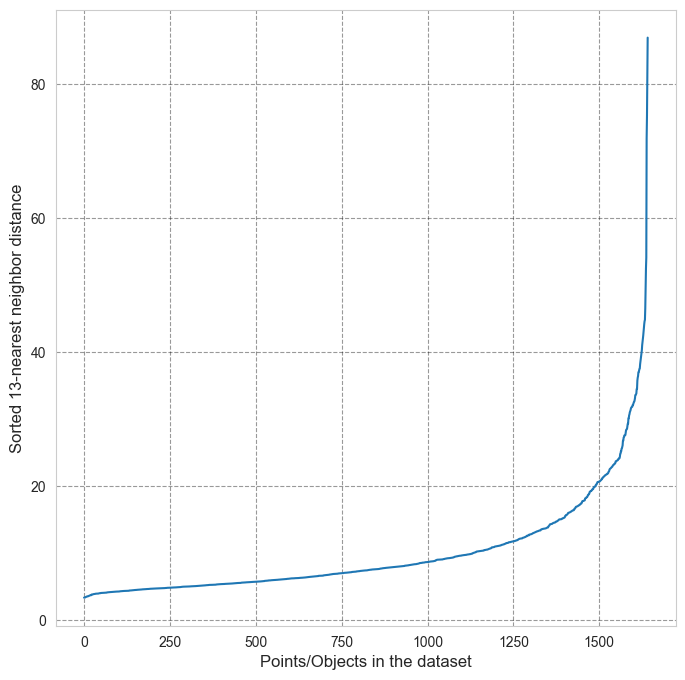

In [10]:
from sklearn.neighbors import NearestNeighbors


def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * data_pca.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=data_pca, k=k)

In [11]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN
dbscan = DBSCAN(eps=33, min_samples=10)

# Проводим кластеризацию данных
clusters = dbscan.fit_predict(data_pca)

# Ищем объекты, отнесенные к кластеру -1 (это аномалии)
anomalies_indices = np.where(clusters == -1)[0]
len(anomalies_indices)

10

In [25]:
np.unique(clusters, return_counts=True)

(array([-1,  0], dtype=int64), array([  10, 1632], dtype=int64))

In [26]:
df = pd.DataFrame(data_pca, columns=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5', 'Dim6', 'Dim7'])
df['Cluster'] = clusters

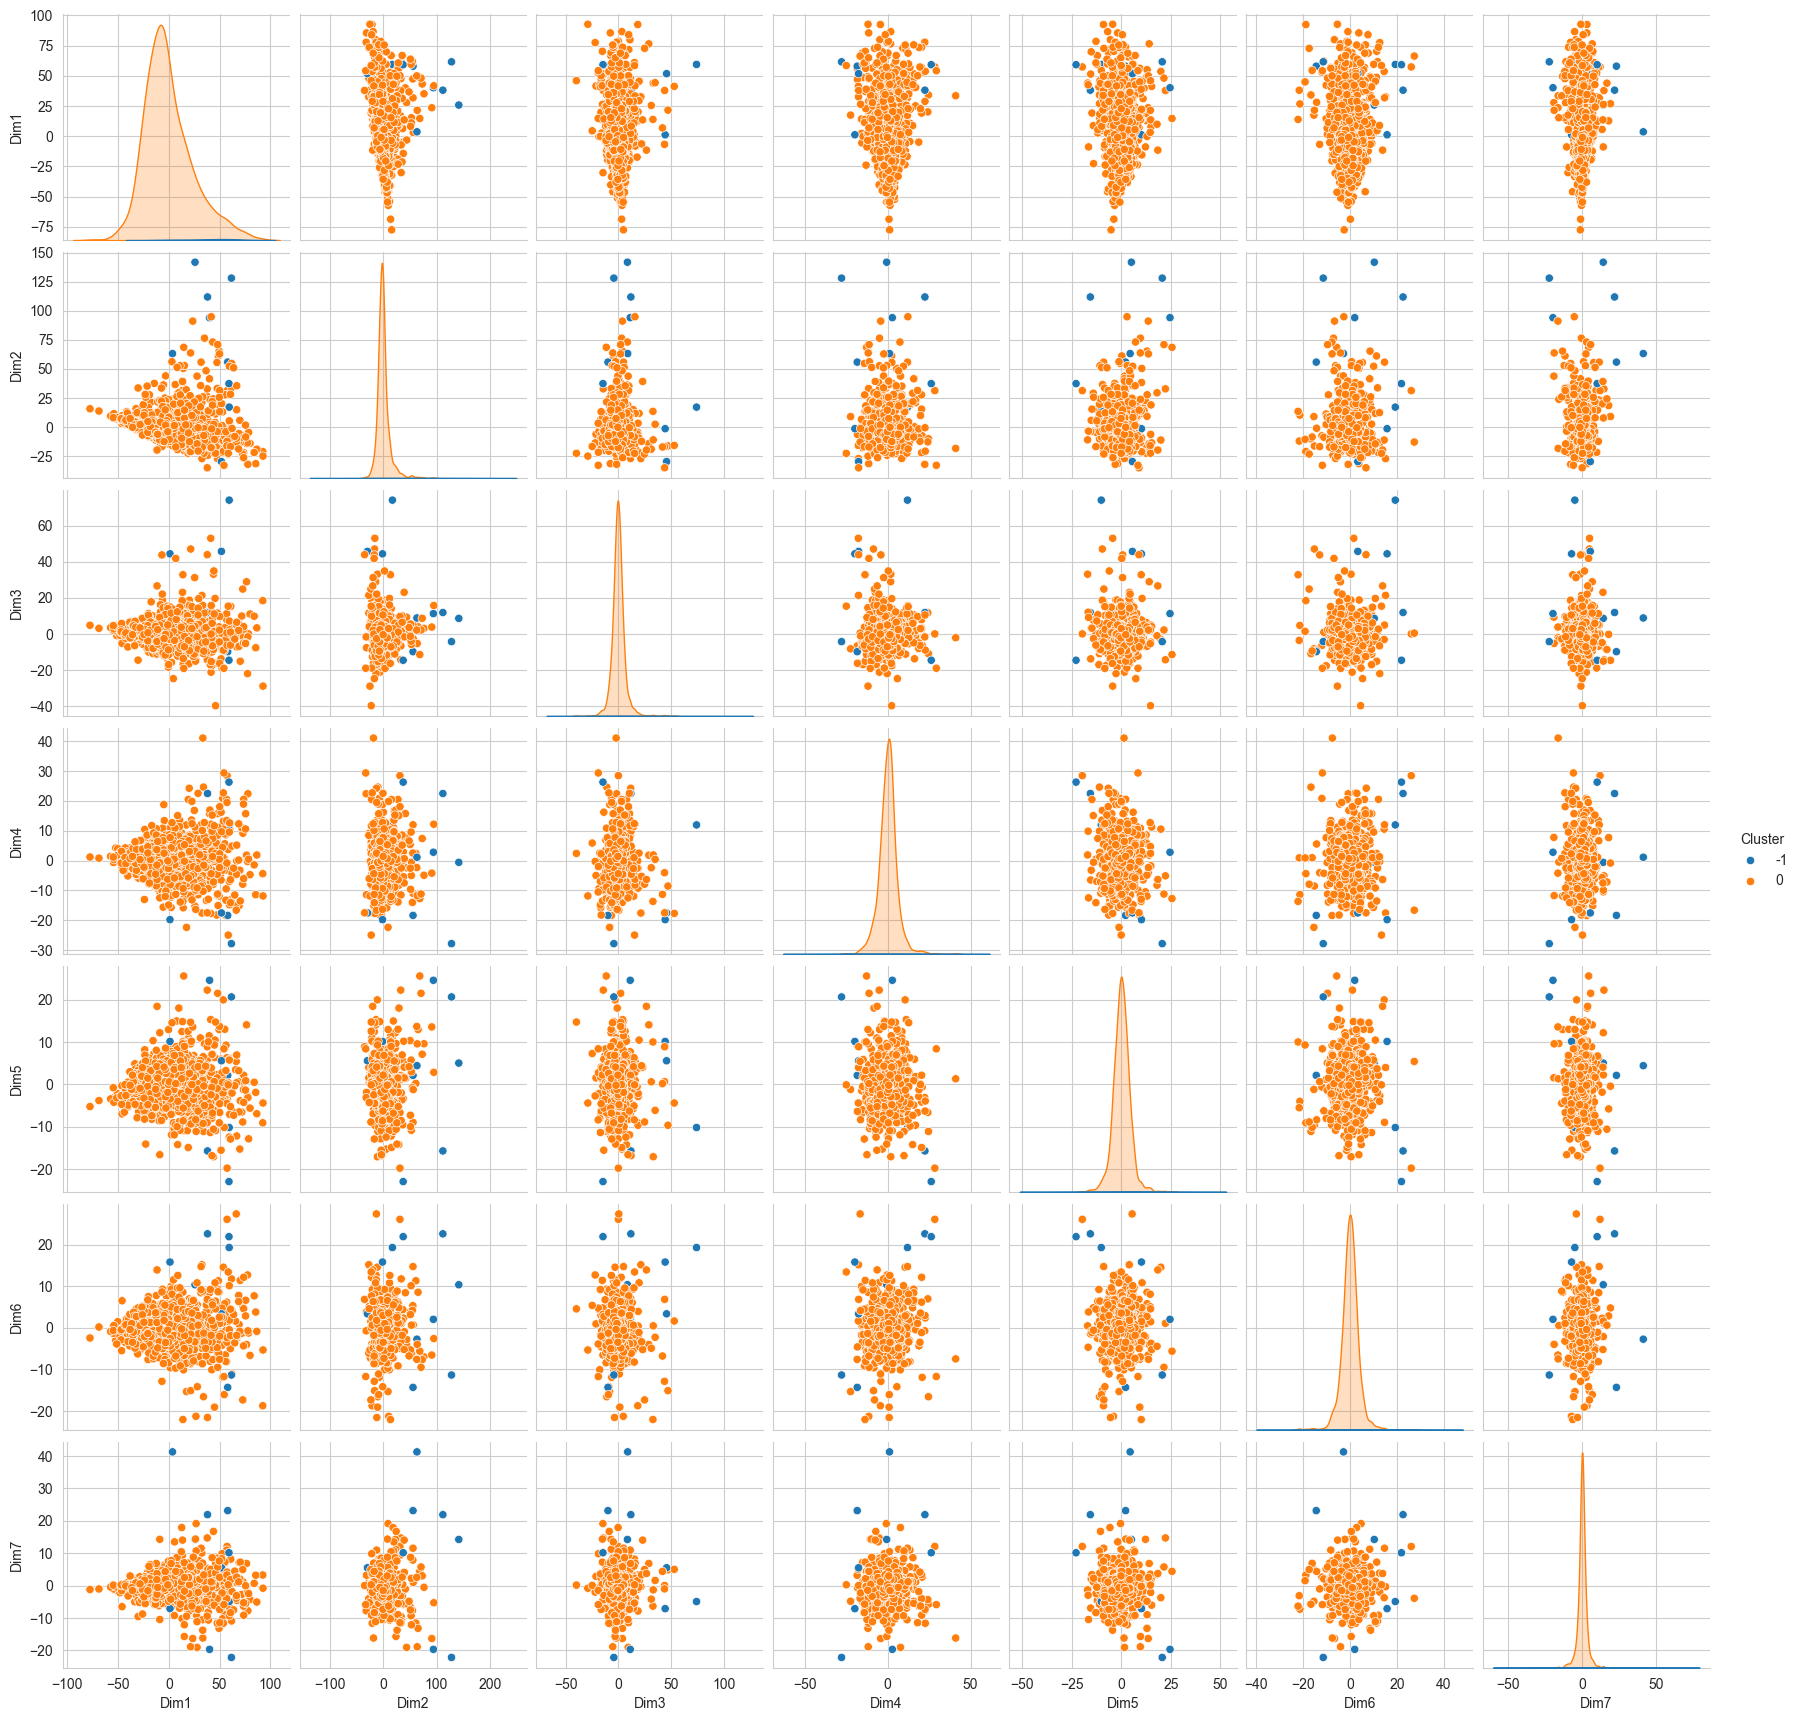

In [27]:
import seaborn as sns

sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()

In [33]:
anomalies_indices

array([ 223,  286,  524,  647,  652,  936, 1049, 1066, 1233, 1457],
      dtype=int64)

In [34]:
def plot_sample(sample):
    _, ax = plt.subplots(figsize=(20, 5))
    ax.plot(data[sample], label='True Row')
    ax.set_title(f'True Row, Sample: {sample}')
    plt.legend()
    plt.show()

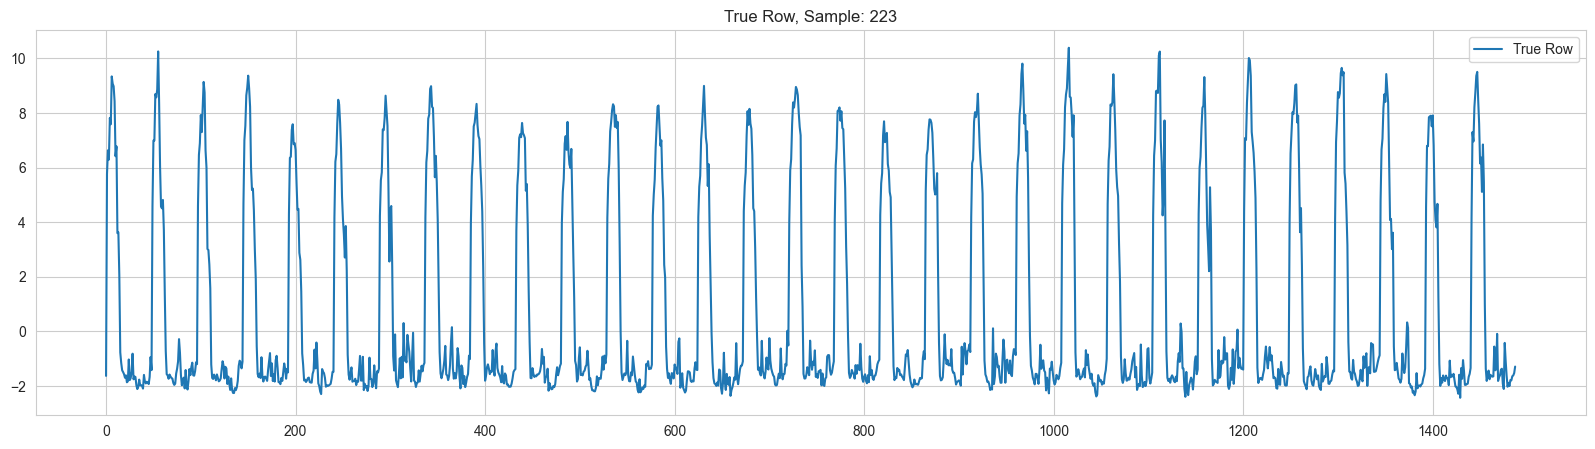

In [35]:
plot_sample(223)

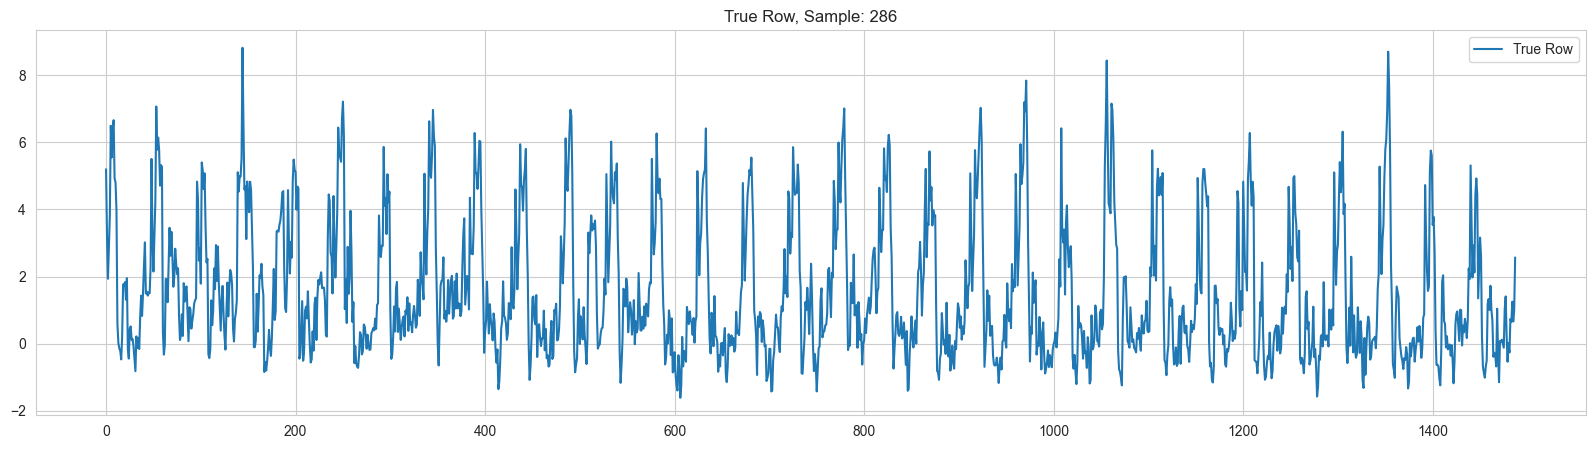

In [36]:
plot_sample(286)

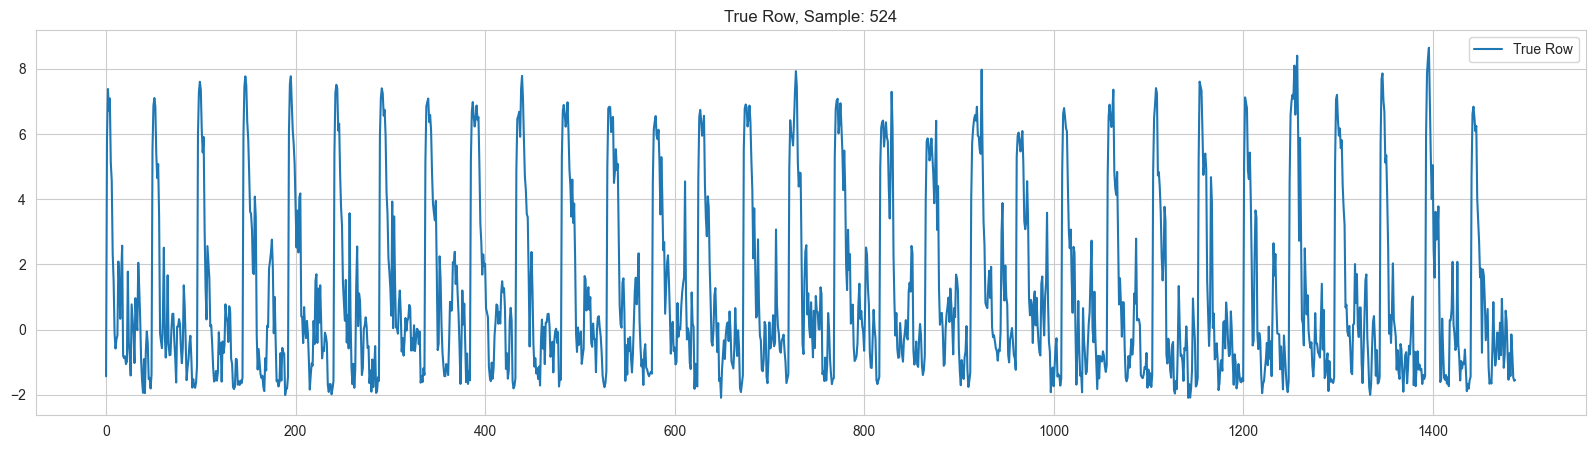

In [37]:
plot_sample(524)